*About Data*

# Delhi Weather Data of 1,00,990 Days
### This dataset was scouted on 2022-02-04 as part of a data sourcing project conducted by TUMI.

* Author	see data set URL
* created	April 4, 2023, 12:00 AM (UTC+05:30)
* Group	Environmental Data Transport
* Organization	TUMI

#### The data can be accessed using the following URL
*https://www.kaggle.com/mahirkukreja/delhi-weather-data?select=testset.csv*

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Inspecting Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testset.csv to testset (1).csv


In [ ]:
df = pd.read_csv('testset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [ ]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


## Data Cleaning

In [ ]:
(df == -9999).sum()


,0
datetime_utc,0
_conds,0
_dewptm,0
_fog,0
_hail,0
_heatindexm,0
_hum,0
_precipm,0
_pressurem,751
_rain,0


In [ ]:
df.replace(-9999, np.nan, inplace = True)

In [ ]:
(df == -9999).sum()

,0
datetime_utc,0
_conds,0
_dewptm,0
_fog,0
_hail,0
_heatindexm,0
_hum,0
_precipm,0
_pressurem,0
_rain,0


In [ ]:
df.isna().sum()

,0
datetime_utc,0
_conds,72
_dewptm,621
_fog,0
_hail,0
_heatindexm,71835
_hum,757
_precipm,100990
_pressurem,983
_rain,0


*Dropping columns with all null values or 90% null values*

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.drop(columns=['_precipm', '_heatindexm', '_wgustm', '_windchillm'], inplace=True)

In [ ]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


*replacing Null values with their column median*

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

*filling Null values in text columns with the text that appears most using mode*

In [ ]:
df['_conds'] = df['_conds'].fillna(df['_conds'].mode()[0])
df['_wdire'] = df['_wdire'].fillna(df['_wdire'].mode()[0])

In [ ]:
df.isna().sum()

,0
datetime_utc,0
_conds,0
_dewptm,0
_fog,0
_hail,0
_hum,0
_pressurem,0
_rain,0
_snow,0
_tempm,0


*fixing date column*

In [ ]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'],format='%Y%m%d-%H:%M',errors='coerce')

In [ ]:
df['datetime_utc'].isna().sum()

np.int64(0)

*fixing binary column*

In [ ]:
binary_cols = ['_fog','_hail','_rain','_snow','_thunder','_tornado']

df[binary_cols].apply(lambda x: x.unique())

,_fog,_hail,_rain,_snow,_thunder,_tornado
0,0,0,0,0,0,0
1,1,1,1,1,1,1


*validating column and their realistic range*

In [ ]:
df.loc[~df['_tempm'].between(-20, 55), '_tempm']


,_tempm
11084,72.0
12951,63.0
68077,62.0
91391,90.0


*converting possible farenheit rows into celcius*

In [ ]:
mask_f = df['_tempm'] > 55
df.loc[mask_f, '_tempm'] = (df.loc[mask_f, '_tempm'] - 32) * 5/9



In [ ]:
df.loc[~df['_tempm'].between(-20, 55), '_tempm']


,_tempm


*fixing humidity column, and filling median values where there is unrealistic value*

In [ ]:
df.loc[~df['_hum'].between(0, 100), '_hum']


,_hum
61570,225.0
73296,135.0
95248,243.0


In [ ]:
df.loc[~df['_hum'].between(0, 100), '_hum'] = np.nan

In [ ]:
df['_hum'] = df['_hum'].fillna(df['_hum'].median())

*fixing pressure column*

In [ ]:
df.loc[~df['_pressurem'].between(870, 1085), '_pressurem']


,_pressurem
744,19.0
1434,10124.0
1709,101.0
2193,101.0
2227,10.0
...,...
95622,1100.0
95987,102.0
96452,9963.0
97250,10065.0


In [ ]:
mask_scaled = df['_pressurem'] > 2000
df.loc[mask_scaled, '_pressurem'] = df.loc[mask_scaled, '_pressurem'] / 10


In [ ]:
mask_invalid = ~df['_pressurem'].between(870, 1085)
df.loc[mask_invalid, '_pressurem'] = np.nan


In [ ]:
df['_pressurem'] = df['_pressurem'].fillna(df['_pressurem'].median())


In [ ]:
df.loc[~df['_pressurem'].between(870, 1085), '_pressurem']

,_pressurem


*checking and validating column to make sure*

In [ ]:
df[~df['_tempm'].between(-20, 55)]
df[~df['_hum'].between(0,100)]
df[~df['_pressurem'].between(870,1085)]


,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm


*renaming column into meaningful name*

In [ ]:
df.rename(columns={
    '_tempm':'temperature',
    '_hum':'humidity',
    '_pressurem':'pressure',
    '_wspdm':'wind_speed',
    '_dewptm':'dew_point',
    '_vism':'visibility',
    '_wdird':'wind_dir_deg',
    '_wdire':'wind_dir_label'
}, inplace=True)


In [ ]:
df.head()

,datetime_utc,_conds,dew_point,_fog,_hail,humidity,pressure,_rain,_snow,temperature,_thunder,_tornado,visibility,wind_dir_deg,wind_dir_label,wind_speed
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,1008.0,0,0,28.0,0,0,2.0,0.0,North,7.4
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,1008.0,0,0,24.0,0,0,2.0,0.0,North,7.4
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,7.4
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


## Descriptive Statistics with NumPy

*tempreture statistics*

In [ ]:
temp_mean   = np.mean(df['temperature'])
temp_median = np.median(df['temperature'])
temp_std    = np.std(df['temperature'], ddof=1)

*humidity statistics*

In [ ]:
hum_mean   = np.mean(df['humidity'])
hum_median = np.median(df['humidity'])
hum_std    = np.std(df['humidity'], ddof=1)


*pressure statistics*

In [ ]:
press_mean   = np.mean(df['pressure'])
press_median = np.median(df['pressure'])
press_std    = np.std(df['pressure'], ddof=1)


In [ ]:
stats = {
    'temperature': {
        'mean': temp_mean,
        'median': temp_median,
        'std': temp_std
    },
    'humidity': {
        'mean': hum_mean,
        'median': hum_median,
        'std': hum_std
    },
    'pressure': {     # replaced precipitation honestly
        'mean': press_mean,
        'median': press_median,
        'std': press_std
    }
}

stats


{'temperature': {'mean': np.float64(25.45962306498993),
  'median': np.float64(27.0),
  'std': 8.450287837858845},
 'humidity': {'mean': np.float64(57.913436973957815),
  'median': np.float64(59.0),
  'std': 23.704337264003364},
 'pressure': {'mean': np.float64(1008.1093395385681),
  'median': np.float64(1008.0),
  'std': 7.2740856092247945}}

*mean, median and standard deviation for tempreture, humidity and pressure*

In [ ]:
stats_df = pd.DataFrame(stats).T
stats_df


,mean,median,std
temperature,25.459623,27.0,8.450288
humidity,57.913437,59.0,23.704337
pressure,1008.109340,1008.0,7.274086


## Monthly and Seasonal Analysis (Using Pandas Group By)

In [ ]:
df['month'] = df['datetime_utc'].dt.month

In [ ]:
monthly_avg = df.groupby('month')[['temperature', 'humidity', 'pressure', 'wind_speed']].mean()

*month wise analysis*

In [ ]:
monthly_avg.round(2)

,temperature,humidity,pressure,wind_speed
month,,,,
1,13.45,75.13,1016.66,6.69
2,17.61,62.97,1014.51,7.84
3,23.82,49.57,1011.01,8.58
4,30.24,34.50,1006.52,9.49
5,33.55,35.22,1001.95,10.79
6,33.46,49.98,998.95,10.66
7,31.31,67.69,998.93,9.03
8,30.55,70.68,1001.30,7.96
9,29.66,66.96,1005.24,7.08


In [ ]:
df['datetime_utc'].head()

,datetime_utc
0,1996-11-01 11:00:00
1,1996-11-01 12:00:00
2,1996-11-01 13:00:00
3,1996-11-01 14:00:00
4,1996-11-01 16:00:00


*season wise analysis*

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)


In [ ]:
seasonal_avg = df.groupby('season')[['temperature', 'humidity', 'pressure', 'wind_speed']].mean()
seasonal_avg.round(2)


,temperature,humidity,pressure,wind_speed
season,,,,
Monsoon,31.26,63.76,1001.08,8.70
Post-Monsoon,23.70,55.95,1012.53,4.67
Summer,29.26,39.75,1006.42,9.64
Winter,15.40,68.61,1016.00,6.50


## Visualizations with Matplotlib

*Line Plot, average tempreture monthly*

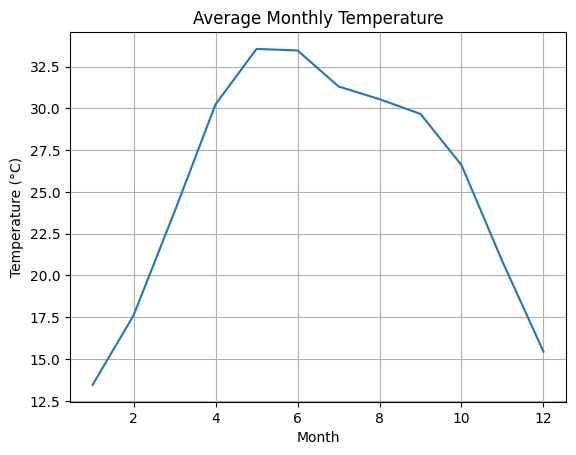

In [ ]:
monthly_avg['temperature'].plot()
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


*Bar plot, humidity by month*

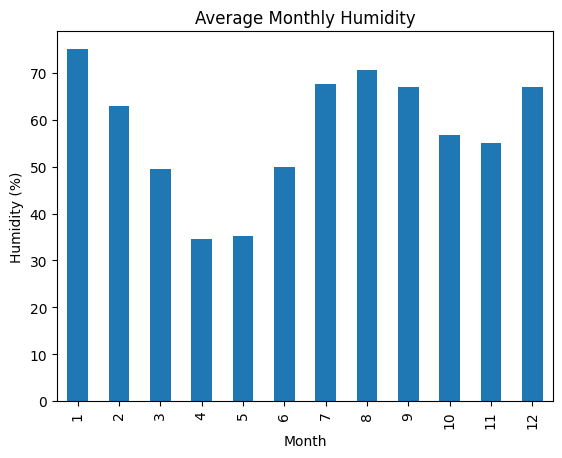

In [ ]:
monthly_avg['humidity'].plot(kind='bar')
plt.title('Average Monthly Humidity')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.show()


*Histogram, tempreture distribution*

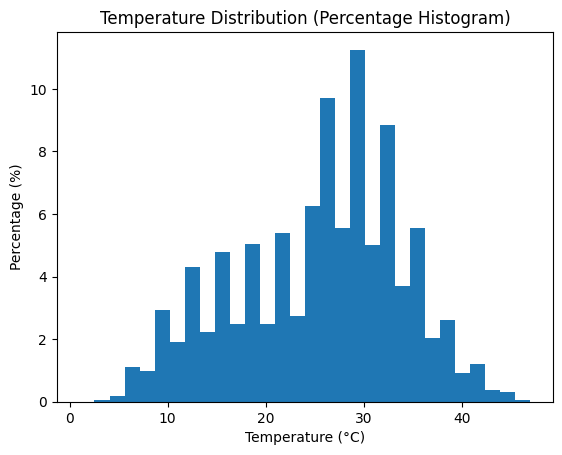

In [ ]:
plt.hist(df['temperature'],bins=30,weights=np.ones(len(df)) * 100 / len(df))

plt.xlabel('Temperature (°C)')
plt.ylabel('Percentage (%)')
plt.title('Temperature Distribution (Percentage Histogram)')
plt.show()


## Identifying Extreme Weather

In [ ]:
temp_np = df['temperature'].to_numpy() #converting to numpy array

In [ ]:
extreme_hot_mask = temp_np >= 45 #extreame values of tempreture
extreme_cold_mask = temp_np <= 5

In [ ]:
extreme_hot_temps = temp_np[extreme_hot_mask] #extracting the values
extreme_cold_temps = temp_np[extreme_cold_mask]

In [ ]:
num_extreme_hot_days = np.sum(extreme_hot_mask) # counting extreame days
num_extreme_cold_days = np.sum(extreme_cold_mask)


* Number of Extreame hot and cold days in delhi out of 1,00,991 days

In [ ]:
print(f"Extreme Hot Days (≥ 45°C): {int(num_extreme_hot_days)}")
print(f"Extreme Cold Days (≤ 5°C): {int(num_extreme_cold_days)}")


Extreme Hot Days (≥ 45°C): 134
Extreme Cold Days (≤ 5°C): 254
